In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset Titanic
df = pd.read_csv("test.csv")

# Visualizar primeiras linhas
print(df.head())



   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [2]:
# Informações gerais
print(df.info())

# Estatísticas descritivas
print(df.describe(include="all"))

# Valores ausentes por coluna
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
        PassengerId      Pclass                      Name   Sex         Age  \
count    418.000000  418.000000                       418   418  332.000000   
unique          NaN         NaN                       418     2         NaN   
top             NaN         NaN  Peter, Mast

In [4]:
# Imputação de Age com mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Cabin: pode ser removida (muitos nulos) ou marcada como "Unknown"
df['Cabin'] = df['Cabin'].fillna("Unknown")

# Embarked: preencher com o valor mais frequente (moda)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [5]:
# Padronizar valores da coluna Sex
df['Sex'] = df['Sex'].str.strip().str.lower()

# Padronizar valores da coluna Embarked
df['Embarked'] = df['Embarked'].str.strip().str.upper()



In [6]:
# Verificar duplicatas
print("Duplicatas:", df.duplicated().sum())

# Remover duplicatas
df = df.drop_duplicates()


Duplicatas: 0


In [7]:
# Converter Age para numérico (já está, mas garantimos)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Converter Fare para float
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


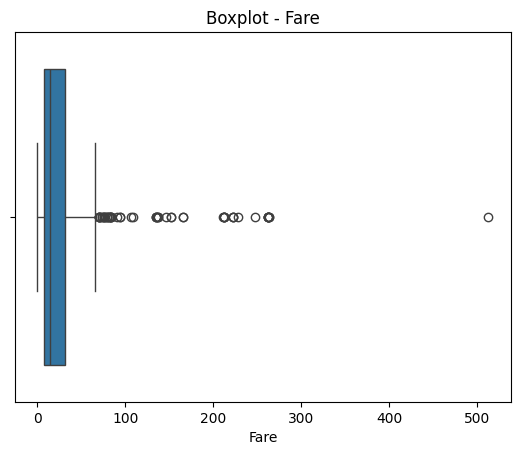

Outliers em Fare: 55


In [8]:
# Boxplot para Fare
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Fare")
plt.show()

# Detectar outliers com IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print("Outliers em Fare:", len(outliers))
